# K Means

Amaç gözlemleri birnirlerine olan benzerleiklerime göre kümelere ayırmaktır. 

Kümeler eiçi benzerlik yüksek kümeler arası benzerlik düşükm olsun isteriz

- Küme saysıs belirlenir k sayıda olsun

- Rastgele k sayıda merkez seçilir

- Her gözlem için k merkezlere uzaklık hessaplanır ve kendisine en yakşn merkeze atanır.

- Atama işlemlerinden sonra oluşan kümeler için tekrardan merkez hesaplamaları yapılır

- Bu işlembelirlenen bir iterasyonnadedince devam edilir. hatası en düşük olann şekil son hal kabul edilir

In [55]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [56]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.head()
#gördüğün gibi eyalet isimleri değişkne gibi olmuş ancak index ismi olmalılar öncelikle onu düzeltelim

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [57]:
x=df.iloc[:,0]
df.index=x
df=df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [58]:
df=df.rename_axis(index=None)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [59]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [61]:
df.describe().T
# Ne görüyoruz murder %75 lik kısım 11 iken max kısım 17 demek ki bir kaç eyalette bu bireden yükseliyor
#mesala murderın ağırlığını arttırmak istersek bir değişkne daha ekleyip 11 in üstü olanları 1 diğerlerine 0 atayabiliriz

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

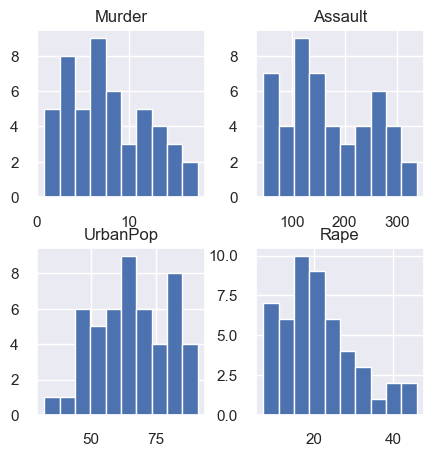

In [62]:
df.hist(figsize=(5,5))

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans=KMeans(n_clusters=4)
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        ~/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the bestcentroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from data
    for the

-------
Parametreler:
n_clusters belirleyeceğimiz merkez sayısı(küme sayısı da diyebilirsin)
n_init merkez uzaklığı belirleme işleminin kaç kez tekrar edileceği


In [65]:
k_fit=kmeans.fit(df)
k_fit.n_clusters

4

In [66]:
k_fit.cluster_centers_

array([[  5.79411765, 129.64705882,  68.29411765,  18.8       ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 10.34285714, 192.28571429,  69.14285714,  24.7       ]])

In [67]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 3, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 3, 1, 2, 3, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [68]:
# hocam göreselleştirmek için değişken sayısını indeirgeme gerekiyor üç küme var iki boyutta nasıl ifade edicez
# had, üç boyut için iç boyutlu grafik kullan ee daha çok boyutlu olursa o zaman da boyut indirgemeye gidibilirsin ama
# onunla uğraşmak istemiyorum o yüzden görselleştirme kısmın agirmiyorum hiç

In [69]:
# hangi eyalet hangi kümede diye öğrenmek istersek. ki isteyelim :))
kumeler = k_fit.labels_
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,3


In [70]:
df["kume_no"]=kumeler
df["kume_no"]=df["kume_no"]+1
df[0:4]

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,4


In [71]:
df["kume_no"].value_counts()

1    17
2    16
3    10
4     7
Name: kume_no, dtype: int64

<AxesSubplot: >

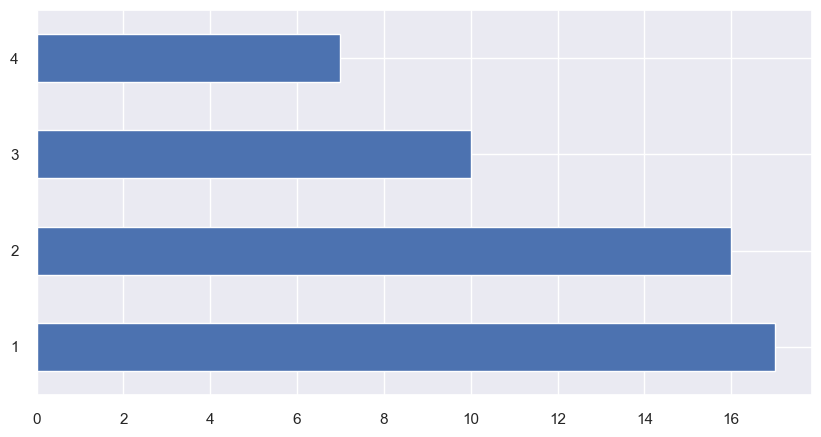

In [72]:
#kümelerdeki eyalet sayısı
plt.figure(figsize=(10,5))
df["kume_no"].value_counts().plot.barh()

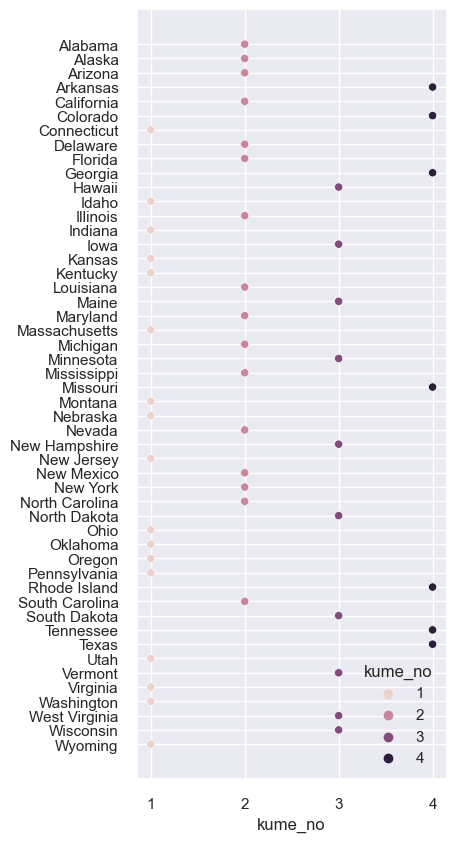

In [73]:
#hangi eyalet hangi kümede görselleştirerek görelim
sns.scatterplot(y=df.index, x=df["kume_no"], hue=df["kume_no"], data=df)
sns.set(rc={'figure.figsize':(4,10)})

# Optimum küme Sayısı

In [74]:
#!pip3 install yellowbrick

In [75]:
from yellowbrick.cluster import KElbowVisualizer

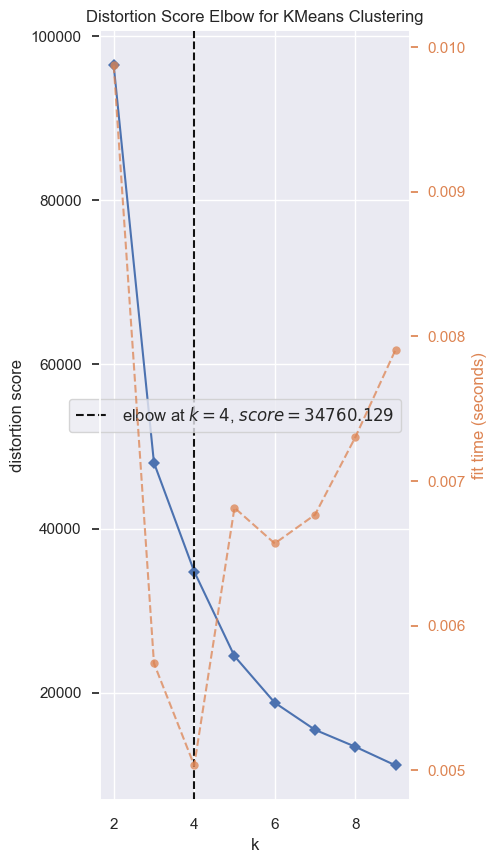

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df)
visualizer.poof()
#distortion score bozulma demek bunun düşük olması işimize gelir
#bu değerin küme sayısı ile ters orantılı olduğunu görürüz ki çok normal
#küme sayısı arttıkça küme içi homojenlik artar

In [77]:
k_menas_final=KMeans(n_clusters=4)
k_fit=kmeans.fit(df)
kumeler=k_fit.labels_

In [78]:
#zaten ilk yaptığımız gibi 4 çıktı :))
